NAME -Satish Prasad

PRN - RBT21CB018

# Aim:
The aim of credit card fraud detection is to identify and prevent unauthorized or fraudulent transactions made using credit cards.

### Objective:
The objective is to develop a robust system that utilizes machine learning algorithms to accurately detect and flag potentially fraudulent transactions, thereby minimizing financial losses for credit card companies and providing security to cardholders.

### Tools Used:
- Programming language: Python
- Libraries: Scikit-learn, Pandas, NumPy, Matplotlib/Seaborn for data analysis, preprocessing, model building, and visualization
- Dataset: Credit card transaction data containing features related to transactions

### Language:
Python is the primary language used due to its extensive libraries for machine learning and data manipulation tasks. Additionally, its flexibility and ease of use make it suitable for developing fraud detection models.

### Description:
1. **Data Collection:** Obtain credit card transaction datasets containing various features like transaction amount, time, and anonymized transaction details.

2. **Data Preprocessing:** Cleanse and preprocess the dataset by handling missing values, scaling features, encoding categorical variables, and potentially handling class imbalance if present.

3. **Exploratory Data Analysis (EDA):** Perform visual and statistical analysis to understand the distribution of features, correlations, and patterns in both fraudulent and non-fraudulent transactions.

4. **Feature Engineering:** Extract relevant features, create new features if necessary, and select the most informative features for modeling.

5. **Model Building:** Utilize machine learning algorithms like Logistic Regression, Random Forest, Gradient Boosting, or Neural Networks to train the model on the labeled data.

6. **Model Evaluation:** Evaluate the model's performance using various metrics such as accuracy, precision, recall, F1-score, and ROC curves. Tune hyperparameters to improve the model's performance.

7. **Deployment:** Deploy the trained model into a production environment to analyze incoming transactions in real-time, flagging suspicious ones for further investigation.


In [52]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt

In [53]:
import warnings
warnings.filterwarnings('ignore')

In [54]:
data = pd.read_csv(r"C:\Users\satish prasad\Desktop\CAPSTONE PROJECT\ML PROJECT\creditcard.csv")

In [55]:
pd.options.display.max_columns = None

# 1. Display Top 5 Rows of The Dataset


In [56]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


# 2. Check Last 5 Rows of The Dataset


In [57]:
data.tail()


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,4.356170,-1.593105,2.711941,-0.689256,4.626942,-0.924459,1.107641,1.991691,0.510632,-0.682920,1.475829,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,-0.975926,-0.150189,0.915802,1.214756,-0.675143,1.164931,-0.711757,-0.025693,-1.221179,-1.545556,0.059616,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,-0.484782,0.411614,0.063119,-0.183699,-0.510602,1.329284,0.140716,0.313502,0.395652,-0.577252,0.001396,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,-0.399126,-1.933849,-0.962886,-1.042082,0.449624,1.962563,-0.608577,0.509928,1.113981,2.897849,0.127434,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,-0.915427,-1.040458,-0.031513,-0.188093,-0.084316,0.041333,-0.302620,-0.660377,0.167430,-0.256117,0.382948,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


# 3. Find Shape of Our Dataset (Number of Rows And Number of Columns)

In [58]:
data.shape

(284807, 31)

In [59]:
print("Number of Rows",data.shape[0])
print("Number of Columns",data.shape[1])

Number of Rows 284807
Number of Columns 31


# 4. Get Information About Our Dataset Like Total Number Rows, Total Number of Columns, Datatypes of Each Column And Memory Requirement

In [60]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

# 5. Check Null Values In The Dataset

In [61]:
data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

# Feature Scaling

In [62]:
from sklearn.preprocessing import StandardScaler

In [63]:
sc = StandardScaler()
data['Amount']=sc.fit_transform(pd.DataFrame(data['Amount']))

In [64]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.244964,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.342475,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,1.160686,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.140534,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,-0.073403,0


In [65]:
data = data.drop(['Time'],axis=1)


In [66]:
data.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.244964,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.342475,0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,1.160686,0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.140534,0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,-0.073403,0


In [67]:
data.shape

(284807, 30)

In [68]:
data.duplicated().any()

True

# Let's Remove Duplicated Values

In [69]:
data = data.drop_duplicates()


In [70]:
data.shape

(275663, 30)

In [71]:
284807- 275663

9144

# 6. Not Handling Imbalanced


In [72]:
data['Class'].value_counts()

0    275190
1       473
Name: Class, dtype: int64

In [73]:
import seaborn as sns

<AxesSubplot:xlabel='Class', ylabel='count'>

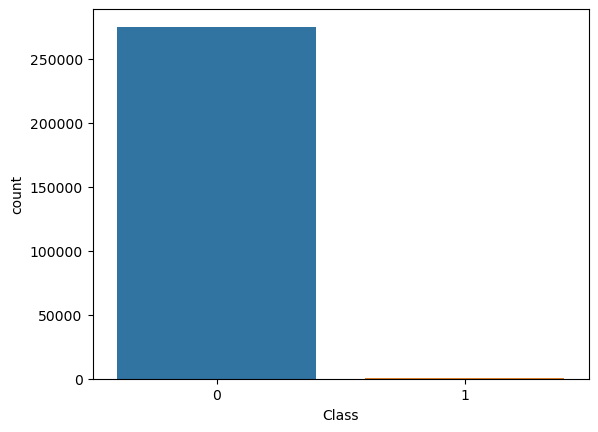

In [74]:
sns.countplot(data['Class'])

# 7. Store Feature Matrix In X And Response (Target) In Vector y

In [75]:
X = data.drop('Class',axis=1)
y = data['Class']

# 8. Splitting The Dataset Into The Training Set And Test Set

In [76]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,
                                                 random_state=42)

# 9. Handling Imbalanced Dataset


Undersampling

In [77]:
normal = data[data['Class']==0]
fraud = data[data['Class']==1]

In [78]:
normal.shape

(275190, 30)

In [79]:
fraud.shape

(473, 30)

In [80]:
normal_sample=normal.sample(n=473)

In [81]:
normal_sample.shape

(473, 30)

In [82]:
new_data = pd.concat([normal_sample,fraud],ignore_index=True)

In [83]:
new_data['Class'].value_counts()

0    473
1    473
Name: Class, dtype: int64

In [84]:
new_data.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-2.609436,-1.914715,1.414677,3.534759,1.075047,-0.815251,0.629162,0.124427,-1.979957,0.638415,1.186172,-0.197686,-0.818260,0.946922,0.575101,-0.078065,0.022310,0.693504,1.076692,1.541837,0.484165,-0.042156,1.067385,0.474223,0.478383,0.251377,-0.166823,0.141822,1.270114,0
1,1.014262,0.447008,0.963731,2.476404,0.115785,0.663869,-0.228475,0.135007,0.327380,0.363326,2.208516,-1.464466,2.483745,1.669370,-0.553001,0.858228,-0.119134,0.011662,-1.170380,-0.046877,-0.265009,-0.665525,0.091318,-0.390824,0.105126,-0.272583,-0.012734,0.020508,-0.140651,0
2,-3.923912,0.849815,-0.425365,-0.947960,0.003406,0.136252,1.394415,-0.935365,0.933449,2.163082,0.734622,0.280849,0.438092,-0.621054,0.513128,0.619869,-1.221528,-0.244818,1.353440,-1.255151,-0.712140,-1.360173,0.412088,-0.825432,-0.334618,0.284046,-3.011481,0.754236,0.061772,0
3,-4.111276,3.499867,0.125727,-2.182450,-0.670721,-0.795408,0.478709,0.130817,2.804384,3.932992,0.199467,0.465060,0.579257,-1.295329,0.928772,-0.094075,-0.602990,-1.123718,-1.468299,1.876106,-0.477379,-0.287778,0.127921,0.062089,0.276311,0.729135,1.010033,0.516886,-0.350151,0
4,2.009284,-2.178900,0.181671,-1.346167,-2.499654,-0.283278,-2.013439,0.119986,-0.194586,1.487438,-1.484052,-1.609259,-0.785889,-0.703036,0.688216,0.291585,0.184345,0.924169,-0.560130,-0.275839,0.108401,0.549803,0.175558,-0.154601,-0.606616,-0.091035,0.049815,-0.010816,0.154528,0


In [85]:
X = new_data.drop('Class',axis=1)
y = new_data['Class']

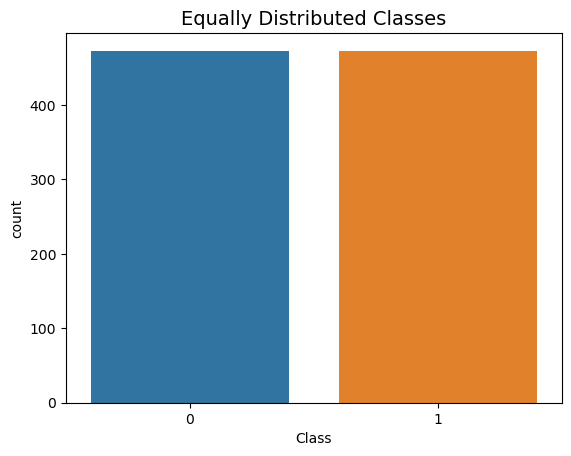

In [86]:
sns.countplot('Class', data=new_data)
plt.title('Equally Distributed Classes', fontsize=14)
plt.show()

In [87]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,
                                                 random_state=42)

# 11. Decision Tree Classifier

In [88]:
from sklearn.metrics import f1_score, recall_score, precision_score, accuracy_score

In [89]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(X_train,y_train)
dt.score(X_train,y_train)

1.0

# k_nearest_neighbours_classification

In [90]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import f1_score, recall_score, precision_score, accuracy_score

In [91]:
# Creating the KNeighborsClassifier model
knn = KNeighborsClassifier(n_neighbors=5)  # You can adjust the number of neighbors as needed


In [92]:
# Training the model
knn.fit(X_train, y_train)
knn.score(X_train, y_train)

0.9537037037037037